In [37]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave
from skimage.morphology import dilation, disk, black_tophat, square, opening, erosion
from skimage.color import rgba2rgb, rgb2gray, gray2rgb, rgb2hsv
from skimage.filters import difference_of_gaussians, threshold_otsu
from skimage.feature import canny, blob_dog, blob_doh, blob_log
from skimage.measure import find_contours, regionprops, label
from skimage.transform import hough_line, hough_line_peaks
import time
from matplotlib.patches import Circle
from skimage.restoration import inpaint
import matplotlib


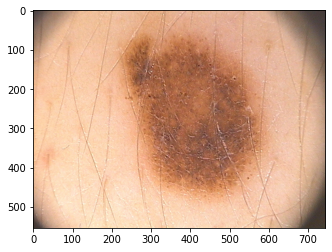

In [3]:
BORDER_SIZE = 10
original = imread('ph2-dataset/IMD027.bmp')
original = original[BORDER_SIZE:-BORDER_SIZE, BORDER_SIZE:-BORDER_SIZE, :]
gray = rgb2gray(original)
plt.imshow(original)
plt.show()

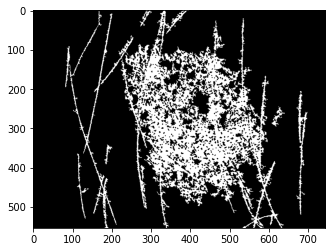

In [32]:
bh = black_tophat(gray, selem=disk(6))
n_bh = (bh - np.mean(bh))/np.std(bh)
th_otsu = threshold_otsu(n_bh)
th_bh = np.where(n_bh < th_otsu, 0, 1)
d_th_bh = dilation(th_bh, selem=disk(1))

labels = label(d_th_bh, connectivity=2)
regions = regionprops(labels)
cleaned = d_th_bh.copy()
for region in regions:
    if region.area <= 300:
        cleaned[labels == region.label] = 0

cleaned = erosion(cleaned, disk(1))

labels = label(cleaned, connectivity=2)
regions = regionprops(labels)
cleaned2 = cleaned.copy()
for region in regions:
    if region.area <= 200:
        cleaned2[labels == region.label] = 0

plt.imshow(cleaned2, cmap="gray")

plt.show()

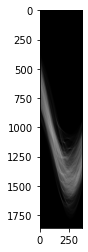

In [36]:
hough, theta, d = hough_line(cleaned2, theta=np.linspace(-np.pi/2, np.pi/2, 360, endpoint=False))
plt.imshow(hough, cmap="gray")
plt.show()

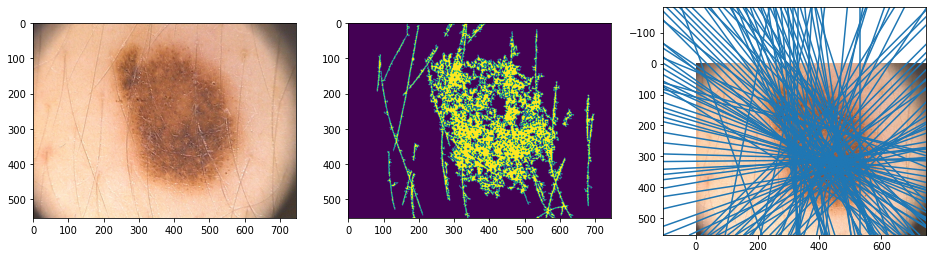

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(16,9))
ax = axes.ravel()
ax[0].imshow(original)
ax[1].imshow(cleaned2)
hough_peaks = hough_line_peaks(hough, theta, d)
ax[2].imshow(original)

for _, angle, dist in zip(*hough_line_peaks(hough, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=(np.tan(angle + np.pi/2)))
    

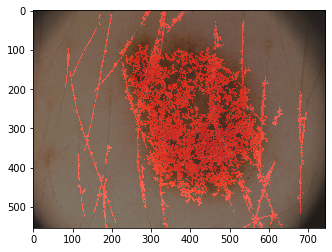

In [33]:
#inpainted_image = inpaint.inpaint_biharmonic(original, th_bh, multichannel=True)
plt.imshow(original)
plt.imshow(cleaned2, cmap=matplotlib.colors.ListedColormap(['black', 'red']), alpha=0.5)
plt.show()